In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.optimize import curve_fit
import seaborn as sns

In [47]:
df = pd.DataFrame(np.genfromtxt("data/bitcoin_data_1_year.csv", delimiter=';', dtype=None, encoding=None))
ethereum_df = pd.DataFrame(np.genfromtxt("data/ethereum_data_1_year.csv", delimiter=';', dtype=None, encoding=None))

In [48]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""


In [49]:
new_headers = df.iloc[0]
df.columns = new_headers
df = df[1:]
new_headers_ethereum = ethereum_df.iloc[0]
ethereum_df.columns = new_headers
ethereum_df = ethereum_df[1:]

In [50]:
df.head(5)

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
1,"""2025-09-12T00:00:00.000Z""","""2025-09-12T23:59:59.999Z""","""2025-09-12T19:56:00.000Z""","""2025-09-12T12:11:00.000Z""","""2781""",115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45,2312575346970.39,"""2025-09-12T23:59:59.999Z"""
2,"""2025-09-11T00:00:00.000Z""","""2025-09-11T23:59:59.999Z""","""2025-09-11T23:58:00.000Z""","""2025-09-11T13:19:00.000Z""","""2781""",113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3,2300873652880.9,"""2025-09-11T23:59:59.999Z"""
3,"""2025-09-10T00:00:00.000Z""","""2025-09-10T23:59:59.999Z""","""2025-09-10T13:50:00.000Z""","""2025-09-10T01:52:00.000Z""","""2781""",111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11,2270015122299.65,"""2025-09-10T23:59:59.999Z"""
4,"""2025-09-09T00:00:00.000Z""","""2025-09-09T23:59:59.999Z""","""2025-09-09T07:31:00.000Z""","""2025-09-09T15:46:00.000Z""","""2781""",112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09,2221551890594.18,"""2025-09-09T23:59:59.999Z"""
5,"""2025-09-08T00:00:00.000Z""","""2025-09-08T23:59:59.999Z""","""2025-09-08T15:26:00.000Z""","""2025-09-08T02:22:00.000Z""","""2781""",111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78,2232377995774.42,"""2025-09-08T23:59:59.999Z"""


In [51]:
df.columns.to_list()

['\ufefftimeOpen',
 'timeClose',
 'timeHigh',
 'timeLow',
 'name',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'marketCap',
 'timestamp']

In [52]:
df.drop(['timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow'], axis=1, inplace=True)
ethereum_df.drop(['\ufefftimeOpen', 'timeClose', 'timestamp', 'name', '\ufefftimeOpen', 'marketCap', 'timeHigh', 'timeLow', 'close'], axis=1, inplace=True)

In [53]:
ethereum_df.rename(columns={'open': 'eth_open', 'high': 'eth_high', 'low': 'eth_low', 'volume': 'eth_volume'}, inplace=True)

In [54]:
df['timeClose'] = df['timeClose'].str.replace('"', '')
df['timeClose'] = df['timeClose'].str.replace('T23:59:59.999Z', '')
df['timeClose'] = df['timeClose'].str.replace('-', '')


In [55]:
df["timeClose"] = pd.to_datetime(df["timeClose"])
df["timeClose"] = (df["timeClose"] - df["timeClose"].iloc[-1])

In [56]:
df.head()

,timeClose,open,high,low,close,volume
1,363 days,115507.7929561424,116769.3825253667,114794.4843507292,116101.5808964756,54785725894.45
2,362 days,113961.4280938375,115522.5438696033,113453.8393085089,115507.5375268541,45685065332.3
3,361 days,111531.2478804626,114275.2527809912,110940.076862647,113955.3589546047,56377473784.11
4,360 days,112077.5772737136,113225.4400409729,110776.7003083141,111530.5499815784,45984480722.09
5,359 days,111163.0177975035,112869.2356980465,110630.6055984677,112071.4310885385,40212813406.78


In [57]:
int(df['timeClose'].iloc[0].days)

363

In [58]:
df["timeClose"] = df["timeClose"].dt.days.astype(int)
df["close"] = (df["close"].astype(float))
df["open"] = (df["open"].astype(float))
df["high"] = (df["high"].astype(float))
df["low"] = (df["low"].astype(float))
df["volume"] = (df["volume"].astype(float))
ethereum_df["eth_open"] = (ethereum_df["eth_open"].astype(float))
ethereum_df["eth_high"] = (ethereum_df["eth_high"].astype(float))
ethereum_df["eth_low"] = (ethereum_df["eth_low"].astype(float))
ethereum_df["eth_volume"] = (ethereum_df["eth_volume"].astype(float))

In [59]:
df.head()

,timeClose,open,high,low,close,volume
1,363,115507.792956,116769.382525,114794.484351,116101.580896,5.478573e+10
2,362,113961.428094,115522.543870,113453.839309,115507.537527,4.568507e+10
3,361,111531.247880,114275.252781,110940.076863,113955.358955,5.637747e+10
4,360,112077.577274,113225.440041,110776.700308,111530.549982,4.598448e+10
5,359,111163.017798,112869.235698,110630.605598,112071.431089,4.021281e+10


In [60]:
df['return'] = (df['close'] - df['open']) / df['open'] * 100

In [61]:
df.head()

,timeClose,open,high,low,close,volume,return
1,363,115507.792956,116769.382525,114794.484351,116101.580896,5.478573e+10,0.514067
2,362,113961.428094,115522.543870,113453.839309,115507.537527,4.568507e+10,1.356695
3,361,111531.247880,114275.252781,110940.076863,113955.358955,5.637747e+10,2.173482
4,360,112077.577274,113225.440041,110776.700308,111530.549982,4.598448e+10,-0.488079
5,359,111163.017798,112869.235698,110630.605598,112071.431089,4.021281e+10,0.817190


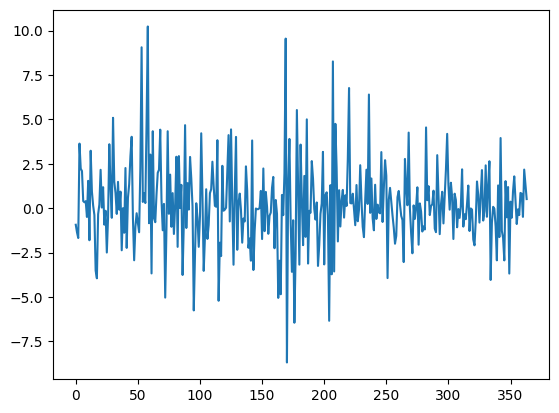

In [62]:
plt.plot(df['timeClose'], df['return'])

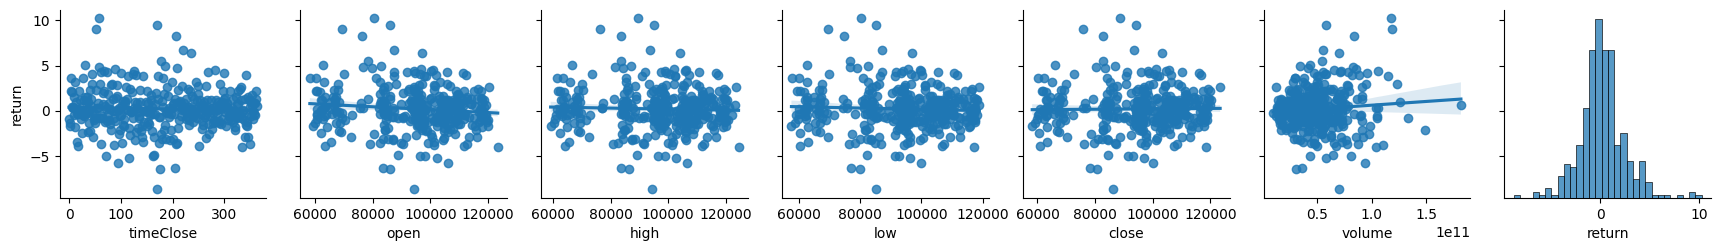

In [63]:
sns.pairplot(df, y_vars=['return'], kind='reg')

In [64]:
X = pd.concat([df[['timeClose', 'open', 'high', 'low', 'volume', 'close']]], axis=1)
y = y = df['return'].values.reshape(-1, 1)

In [65]:
regression = LinearRegression()
regression.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred = regression.predict(X)
r2 = r2_score(y_pred, y)
print(r2)

0.9761230224015054


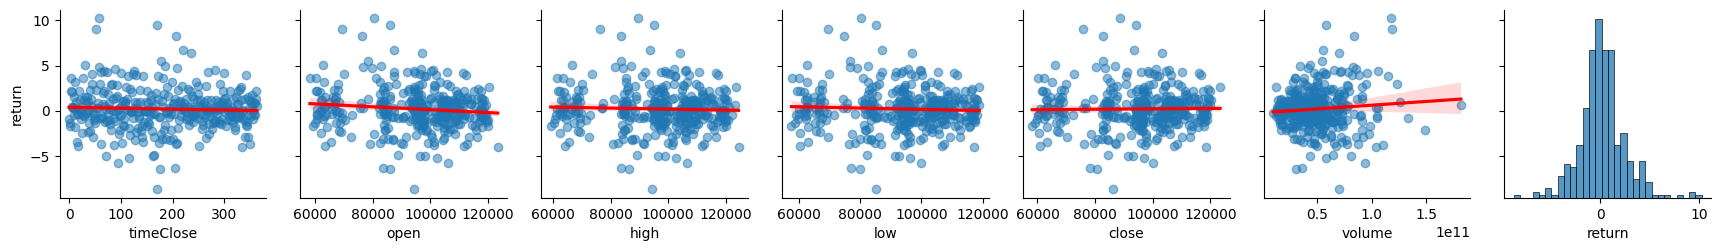

In [67]:
sns.pairplot(df, y_vars=['return'], kind='reg', plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}})

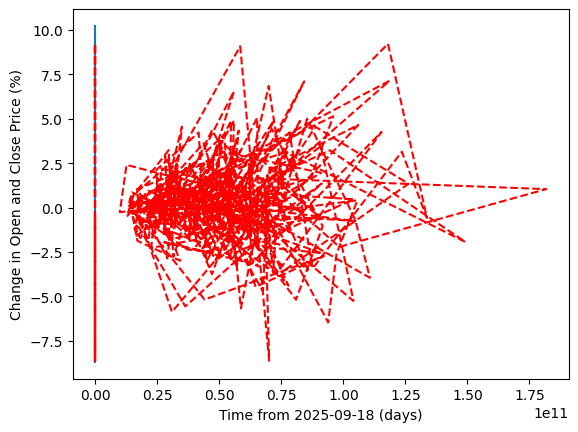

In [68]:
plt.plot(df['timeClose'], df['return'])
plt.plot(X, y_pred, color='red', label='Line of Best Fit', linestyle='--')
plt.xlabel("Time from 2025-09-18 (days)")
plt.ylabel("Change in Open and Close Price (%)")
plt.show()

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
adf_test = adfuller(df['return'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -20.240500
p-value: 0.000000


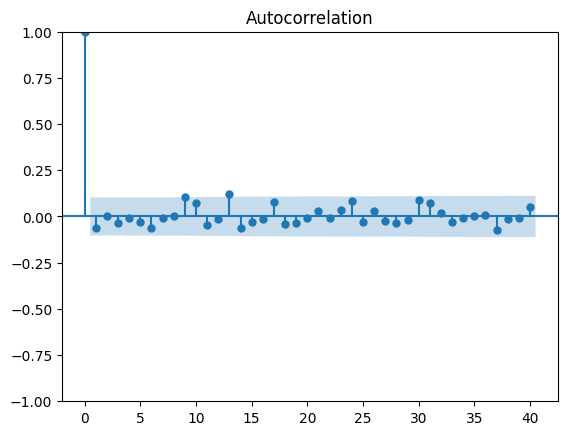

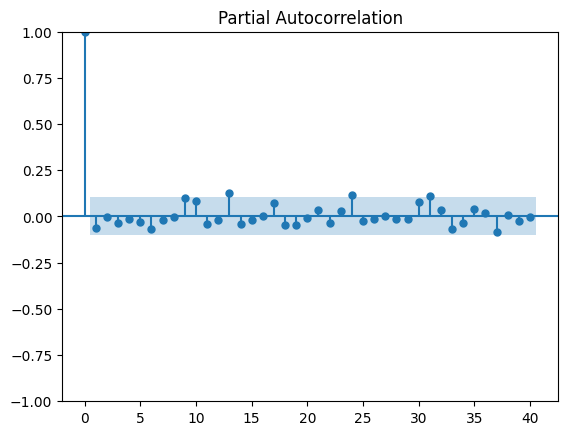

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['return'], lags=40)
plot_pacf(df['return'], lags=40)
plt.show()

In [72]:
train_size = int(len(df['return']) * 0.8)
train, test = train_test_split(df['return'], train_size=train_size/len(df), shuffle=False)

In [73]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(50, 0, 50))
model_fit = model.fit()

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11

In [74]:
test_forecast = model_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [75]:
mse = mean_squared_error(test[:-1], test_forecast_series.dropna())
rmse = mse**0.5
mape = mean_absolute_percentage_error(test[:-1], test_forecast_series.dropna())
r2 = r2_score(test[:-1], test_forecast_series.dropna())
print(rmse)
print(mape)
print(r2)

2.734965743377888
7.779990936495728
-0.1322942538450591


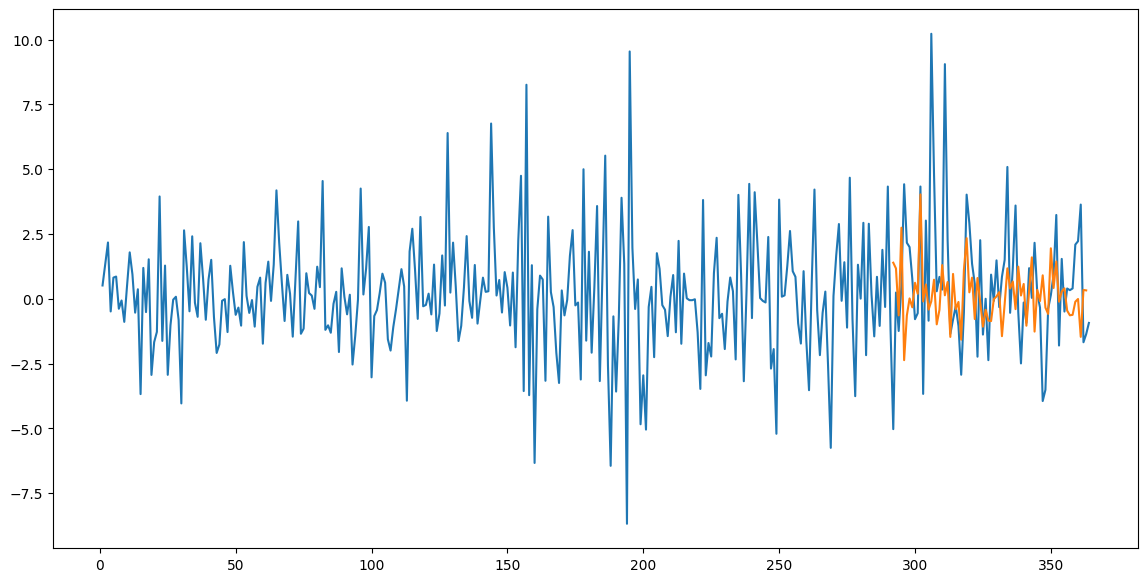

In [76]:
plt.figure(figsize=(14,7))
plt.plot(df['return'], label='Training Data')
plt.plot(test_forecast_series.dropna(), label='forecast')

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from skforecast import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster

ImportError: cannot import name 'ForecasterAutoreg' from 'skforecast' (/Users/ps/Documents/GitHub/aiqf-cyrpto/venv/lib/python3.11/site-packages/skforecast/__init__.py)

In [ ]:
forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=42),
    lags=10
)